In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# standarise the data
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [ ]:
# Data collection and analysis
car_ds = pd.read_csv('/content/car_data.csv')

#printing the first 5 of dataset
car_ds.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
# printing the last 5 of the dataset
car_ds.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [ ]:
# No of rows and columns
car_ds.shape

(1000, 5)

In [ ]:
# User id has nothing to do with this
car_ds.drop("User ID", axis=1, inplace=True)
car_ds

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [ ]:
# Converting Gender to 0 and 1
car_ds['Gender'] = car_ds['Gender'].map({'Male':1,'Female':0})
car_ds

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [ ]:
# what are the mean salaries of people who purchased and not purchased the car
car_ds.groupby('Purchased').mean()

,Gender,Age,AnnualSalary
Purchased,,,
0,0.503344,34.700669,62373.745819
1,0.455224,48.146766,88033.582090


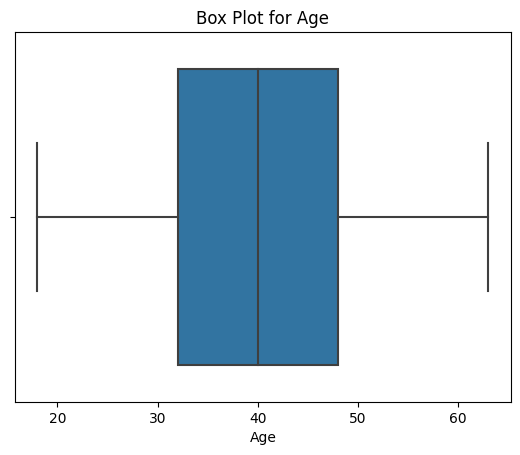

In [ ]:
# visualising the data
sns.boxplot(x='Age', data=car_ds)
plt.title('Box Plot for Age')
plt.show()


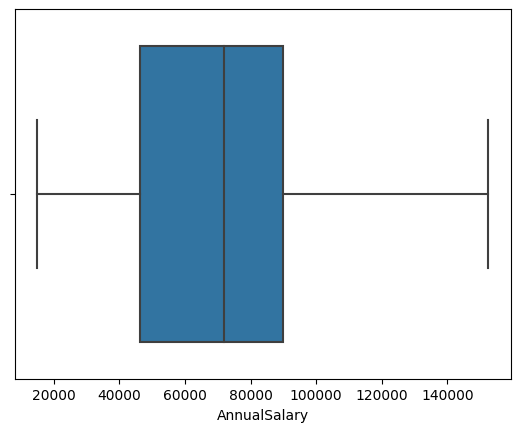

In [ ]:
# visualising the data
sns.boxplot(x='AnnualSalary', data=car_ds)
plt.show()


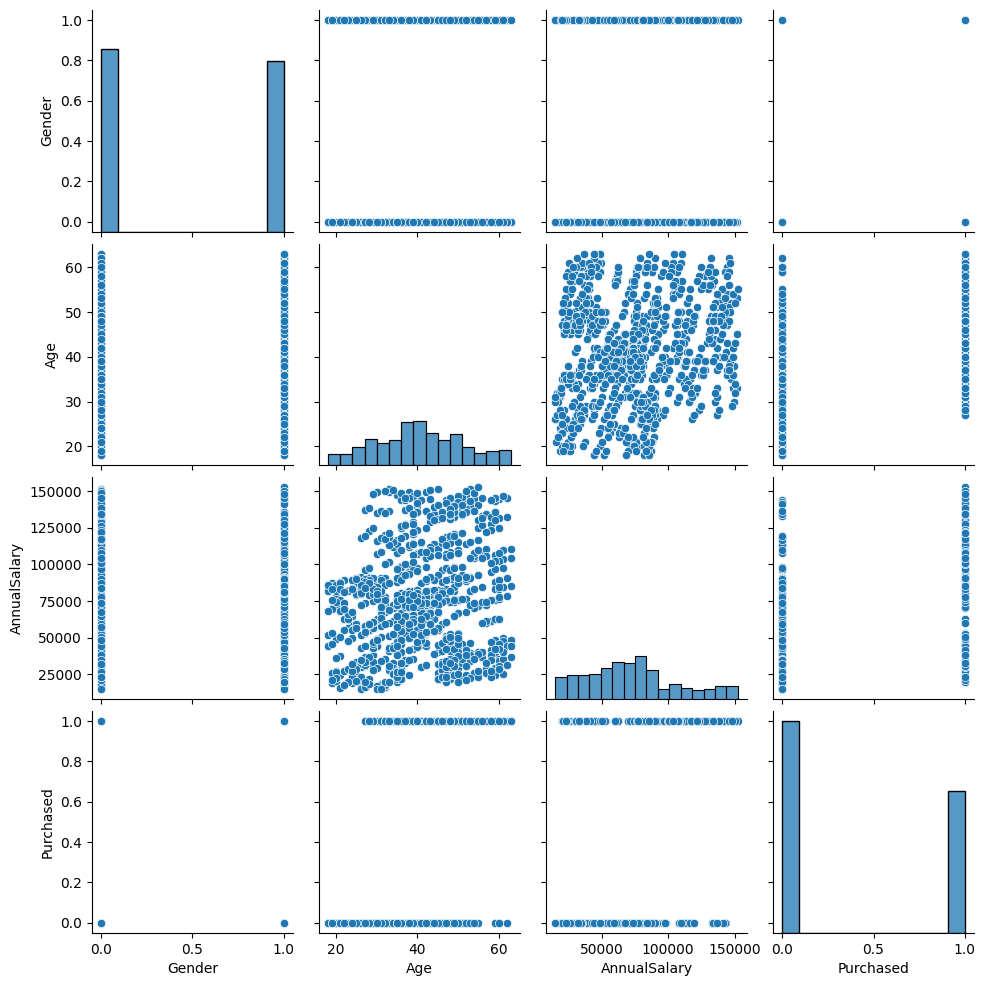

In [ ]:
# Visualize the distribution of multiple columns using a pair plot
sns.pairplot(car_ds)
plt.show()

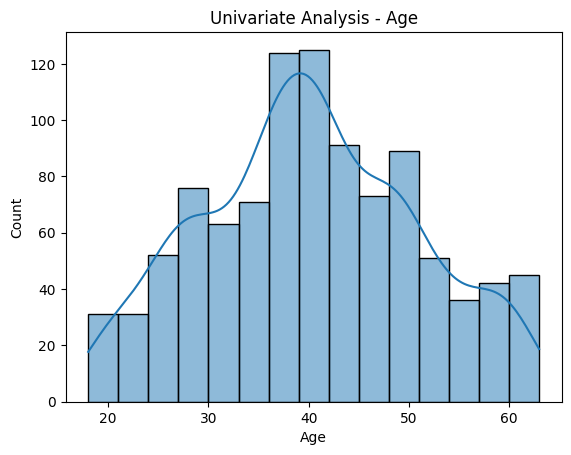

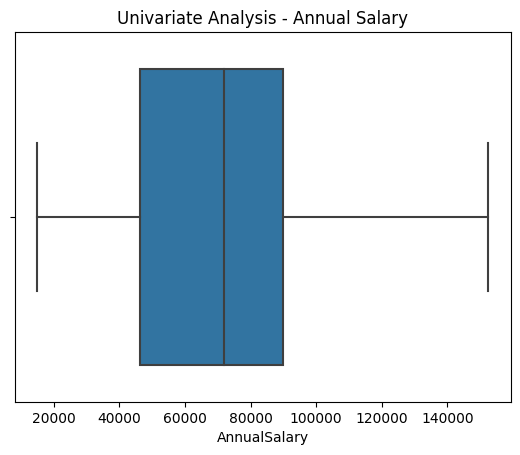

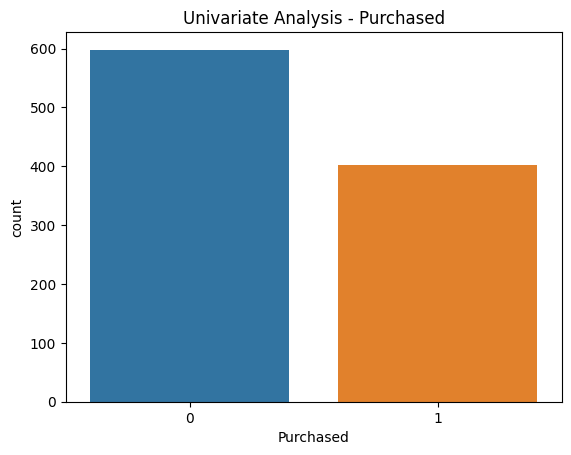

In [ ]:
# Univariate analysis for 'Age'
sns.histplot(car_ds['Age'], kde=True)
plt.title('Univariate Analysis - Age')
plt.show()

# Univariate analysis for 'AnnualSalary'
sns.boxplot(x=car_ds['AnnualSalary'])
plt.title('Univariate Analysis - Annual Salary')
plt.show()

# Univariate analysis for 'Purchased' (assuming it's a categorical variable)
sns.countplot(x=car_ds['Purchased'])
plt.title('Univariate Analysis - Purchased')
plt.show()

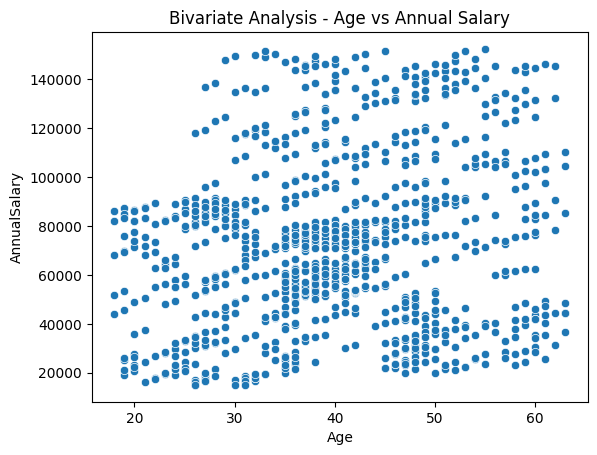

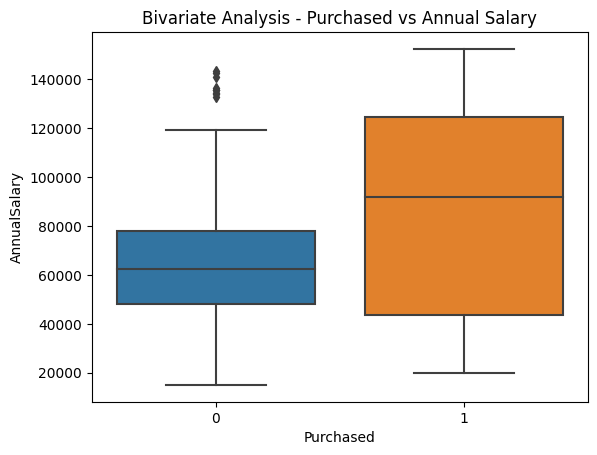

In [ ]:
# Bivariate analysis for 'Age' and 'AnnualSalary'
sns.scatterplot(x='Age', y='AnnualSalary', data=car_ds)
plt.title('Bivariate Analysis - Age vs Annual Salary')
plt.show()

# Bivariate analysis for 'Purchased' and 'AnnualSalary'
sns.boxplot(x='Purchased', y='AnnualSalary', data=car_ds)
plt.title('Bivariate Analysis - Purchased vs Annual Salary')
plt.show()

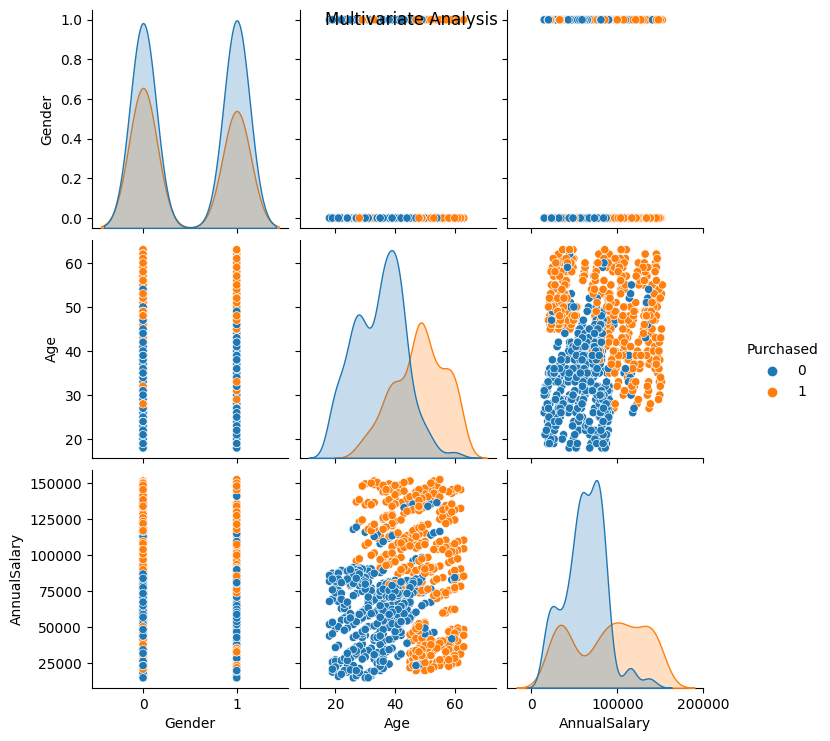

In [ ]:
# Multivariate analysis using pairplot for 'Age', 'AnnualSalary', and 'Purchased'
sns.pairplot(car_ds, hue='Purchased')
plt.suptitle('Multivariate Analysis')
plt.show()


Data Preprocessing

In [ ]:
# Descriptive statistics for the entire dataset
print(car_ds.describe())

# Correlation matrix for numerical variables
correlation_matrix = car_ds[['Age', 'AnnualSalary']].corr()
print(correlation_matrix)


            Gender          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean      0.484000    40.106000   72689.000000     0.402000
std       0.499994    10.707073   34488.341867     0.490547
min       0.000000    18.000000   15000.000000     0.000000
25%       0.000000    32.000000   46375.000000     0.000000
50%       0.000000    40.000000   72000.000000     0.000000
75%       1.000000    48.000000   90000.000000     1.000000
max       1.000000    63.000000  152500.000000     1.000000
                   Age  AnnualSalary
Age           1.000000      0.166042
AnnualSalary  0.166042      1.000000


In [ ]:
# how many purchased and how many didnt
car_ds['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [ ]:
# Finding Null values
car_ds.isnull().sum()
car_ds

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [ ]:
# getting the statistical measures of the data
car_ds.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


In [ ]:
# separate the data and label ( separating outcome)
X = car_ds.drop(columns = 'Purchased',axis=1)
Y = car_ds['Purchased']

In [ ]:
X

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000
...,...,...,...
995,1,38,59000
996,0,47,23500
997,0,28,138500
998,0,48,134000


In [ ]:
Y


0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [ ]:
# Data Standardization ( Standardizing the data to a particular range)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 1.03252879 -0.47711966 -1.52849808]
 [ 1.03252879 -0.00990495 -0.84676745]
 [ 1.03252879  0.83108153  0.03803187]
 ...
 [-0.968496   -1.13122026  1.90916486]
 [-0.968496    0.73763859  1.77862069]
 [-0.968496    0.36386682  0.02352696]]


In [ ]:
X = standardized_data

In [ ]:
X

array([[ 1.03252879, -0.47711966, -1.52849808],
       [ 1.03252879, -0.00990495, -0.84676745],
       [ 1.03252879,  0.83108153,  0.03803187],
       ...,
       [-0.968496  , -1.13122026,  1.90916486],
       [-0.968496  ,  0.73763859,  1.77862069],
       [-0.968496  ,  0.36386682,  0.02352696]])

In [ ]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [ ]:
# Train - Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,random_state =2 )
print(X_train.shape,X_test.shape,X.shape)

(800, 3) (200, 3) (1000, 3)


In [ ]:
# Training the model
Classifier = svm.SVC(kernel = 'linear')

In [ ]:
# Fitting training data to classifier
Classifier.fit(X_train,Y_train)

SVC(kernel='linear')

ValueError: ignored

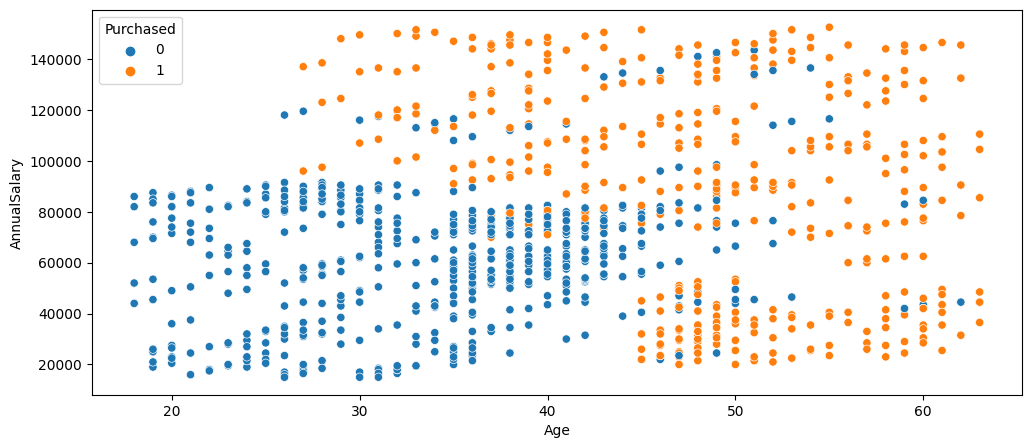

In [ ]:
# Plot the decision boundaries
plt.figure(figsize=(12, 5))

# Plot decision boundary for "Purchased"
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=car_ds)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Create a meshgrid for the decision boundary plot
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = Classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Predict on the meshgrid points for both classes
Z_purchased = Classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_not_purchased = -Z_purchased

# Reshape for contour plot
Z_purchased = Z_purchased.reshape(xx.shape)
Z_not_purchased = Z_not_purchased.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 5))

# Subplot 1: Decision boundary for "Purchased"
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_purchased, cmap=plt.cm.Paired, alpha=0.8)
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=car_ds)
plt.title('SVM Decision Boundary - Purchased')

# Subplot 2: Decision boundary for "Not Purchased"
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_not_purchased, cmap=plt.cm.Paired, alpha=0.8)
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=car_ds)
plt.title('SVM Decision Boundary - Not Purchased')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the Model

# Checking the accuracy
X_train_prediction = Classifier.predict(X_train)
Training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(Training_data_accuracy)

0.82875


In [ ]:
# Checking the accuracy of test data
X_test_prediction = Classifier.predict(X_test)
Testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(Testing_data_accuracy)

0.815


In [ ]:
# classification report
# Assuming you have X_test and Y_test
predictions = Classifier.predict(X_test)

# Generate the classification report
report = classification_report(Y_test, predictions)

# Print or use the report as needed
print(report)


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       120
           1       0.79      0.74      0.76        80

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
# Making a predictive System
input = (12,'Male',23,1000)
# Changing the input data to numpy array
input_np = np.asarray(input)
# Changing gender to 1 or 0

male_mask = input_np == 'Male'
female_mask = input_np == 'Female'

input_np[male_mask] = '1'
input_np[female_mask] = '0'

# remvoing userid
input_np= input_np[1:]

print(input_np)
# reshape the array as we predict for 1 instance
input_np_reshape = input_np.reshape(1,-1)

print(input_np)

# standardize the data
std_input = scaler.transform(input_np_reshape)

# predicting the output
prediction = Classifier.predict(std_input)
print(prediction)

if(prediction == 1):
  print('The person has purchased a car')
else:
  print('The person has not purchased a car')

['1' '23' '1000']
['1' '23' '1000']
[0]
The person has not purchased a car


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained Model


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(Classifier,open(filename,'wb'))

In [ ]:
#loading the model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
# Making a predictive System
input = (12,'Male',23,0)
# Changing the input data to numpy array
input_np = np.asarray(input)
# Changing gender to 1 or 0

male_mask = input_np == 'Male'
female_mask = input_np == 'Female'

input_np[male_mask] = '1'
input_np[female_mask] = '0'

# remvoing userid
input_np= input_np[1:]

# reshape the array as we predict for 1 instance
input_np_reshape = input_np.reshape(1,-1)

# standardize the data
std_input = scaler.transform(input_np_reshape)


# predicting the output
prediction = loaded_model.predict(std_input)
print(prediction)

if(prediction == 1):
  print('The person has purchased a car')
else:
  print('The person has not purchased a car')

[0]
The person has not purchased a car


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
